In [1]:
## This file is part of Jax Geometry
#
# Copyright (C) 2021, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/jaxgeometry
#
# Jax Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# Jax Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Jax Geometry. If not, see <http://www.gnu.org/licenses/>.
#

# LDDMM landmark dynamics

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.manifolds.landmarks import *
M = landmarks(3)
print(M)
from src.plotting import *

3 landmarks in R^2 (dim 6). kernel Gaussian, k_alpha=1, k_sigma=[[0.5 0. ]
 [0.  0.5]]


In [4]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

In [5]:
# example configuration
M.k_sigma = jnp.diag(jnp.array([.5,.5]))

q = M.coords(jnp.vstack((np.linspace(-.5,.5,M.N),np.zeros(M.N))).T.flatten())
v = jnp.array(jnp.vstack((np.zeros(M.N),np.ones(M.N))).T.flatten())
p = M.flat(q,v)
print("q = ", q)
print("p = ", p)

q =  (DeviceArray([-0.5,  0. ,  0. ,  0. ,  0.5,  0. ], dtype=float32), DeviceArray([0.], dtype=float32))
p =  [ 0.          0.9847163   0.         -0.19452119  0.          0.9847162 ]


## Geodesics

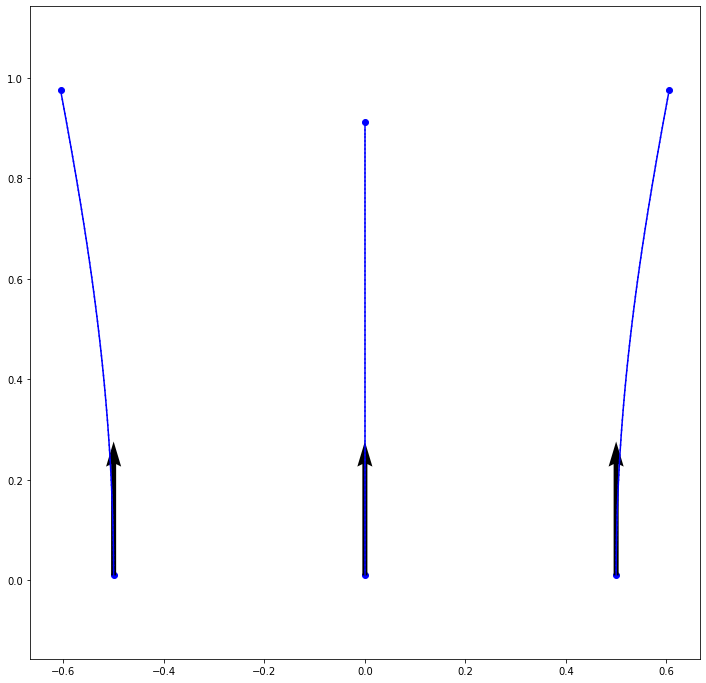

In [6]:
# 2nd order geodesic equation
from src.Riemannian import geodesic
geodesic.initialize(M)

(qs,charts) = M.Expt(q,v)
M.plot()
M.plot_path(zip(qs,charts),v,linewidth=1.5)
plt.show()

0.8874557


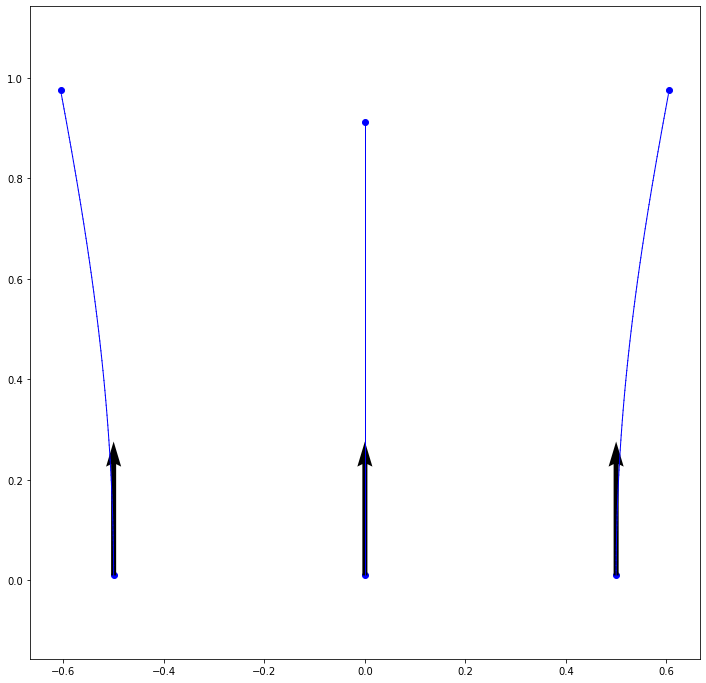

Energy:  [0.8874631  0.8874705  0.8874779  0.88748527 0.8874927  0.88750017
 0.8875076  0.88751507 0.8875225  0.88752985 0.8875373  0.88754475
 0.8875522  0.8875596  0.88756716 0.8875747  0.8875822  0.8875897
 0.8875972  0.8876048  0.8876123  0.8876198  0.88762736 0.88763493
 0.88764244 0.8876501  0.88765764 0.8876653  0.8876729  0.88768065
 0.8876883  0.8876959  0.88770366 0.8877113  0.887719   0.8877267
 0.8877345  0.8877422  0.8877499  0.8877576  0.8877653  0.88777304
 0.8877808  0.88778853 0.8877963  0.8878041  0.88781184 0.88781947
 0.88782716 0.88783485 0.8878425  0.8878502  0.8878579  0.88786554
 0.8878732  0.88788086 0.88788843 0.887896   0.8879036  0.88791114
 0.8879186  0.88792604 0.88793355 0.88794094 0.8879483  0.8879556
 0.8879629  0.8879701  0.8879773  0.88798445 0.88799155 0.8879985
 0.8880055  0.8880124  0.88801926 0.88802606 0.88803273 0.8880394
 0.888046   0.88805264 0.8880591  0.8880655  0.8880719  0.88807815
 0.88808435 0.88809043 0.8880966  0.88810253 0.8881084  0.

In [7]:
# Hamiltonian dynamics
from src.dynamics import Hamiltonian
Hamiltonian.initialize(M)

print(M.H(q,p))

# geodesic
(qs,charts) = M.Exp_Hamiltoniant(q,p)

M.plot()
M.plot_path(zip(qs,charts),v)
plt.show()

# dynamics returning both position and momentum
(ts,qps,_) = M.Hamiltonian_dynamics(q,p,dts())
ps = qps[:,1,:]
print("Energy: ",np.array([M.H((q,chart),p) for (q,p,chart) in zip(qs,ps,charts)]))

## Boundary value problem

[-7.56105613e-06  9.84725522e-01  4.49689100e-08 -1.94535802e-01
  7.48320155e-06  9.84725403e-01]
[ 0.          0.9847163   0.         -0.19452119  0.          0.9847162 ]


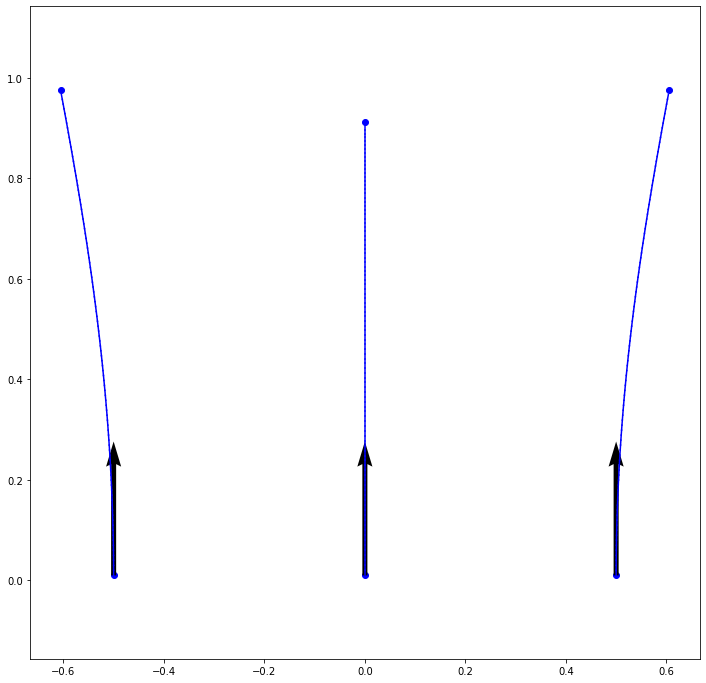

In [8]:
# Logarithm map
from src.Riemannian import Log
Log.initialize(M,f=M.Exp_Hamiltonian)

p_Log = M.Log(q,(qs[-1],charts[-1]))[0]
print(p_Log)
print(p)

(qs,charts) = M.Exp_Hamiltoniant(q,p_Log)
M.plot()
M.plot_path(zip(qs,charts),v,linewidth=1.5)
plt.show()

## Curvature

In [9]:
from src.Riemannian import curvature
curvature.initialize(M)
print("curvature shape= ", M.R(q).shape)
# print("curvature = ", M.Rf(q))
# Ricci and scalar curvature:
print("Ricci curvature = ", M.Ricci_curv(q))
print("Scalar curvature = ", M.S_curv(q))

curvature shape=  (6, 6, 6, 6)
Ricci curvature =  [[ -8.350334    0.          3.619616    0.          6.389675    0.       ]
 [  0.         -5.605492    0.          9.125607    0.         -3.2491648]
 [  3.619618    0.         -9.581074    0.          3.619614    0.       ]
 [  0.          9.125607    0.        -17.449196    0.          9.12561  ]
 [  6.389676    0.          3.6196148   0.         -8.35033     0.       ]
 [  0.         -3.2491632   0.          9.125608    0.         -5.6054974]]
Scalar curvature =  -23.170404


In [10]:
# plot min of Ricci curvature tensor between two landmarks, one fixed at x1=(0,0)
if M.N == 2:
    x1 = jnp.array([0.,0.])

    # grids
    pts = 40 # even number to avoid (0,0), high value implies nicer plot but extended computation time
    border = .2
    minx = -border
    maxx = +border
    miny = -border
    maxy = +border
    X, Y = np.meshgrid(np.linspace(minx,maxx,pts),np.linspace(miny,maxy,pts))
    xy = np.vstack([X.ravel(), Y.ravel()]).T        

    # plot
    newfig()
    cmap = cm.jet
    alpha = 1
    ax = plt.gca()
    fs = np.array([np.min(np.real(np.linalg.eigvals(
        np.dot(M.gsharp(M.coords(np.concatenate((x1,x)))),
               M.Ricci_curv(M.coords(np.concatenate((x1,x))))
              )))) for x in xy])
    norm = mpl.colors.Normalize(vmin=np.min(fs),vmax=np.max(fs))
    colors = cmap(norm(fs)).reshape(X.shape+(4,))
    surf = ax.plot_surface(X, Y, fs.reshape(X.shape), rstride=1, cstride=1, cmap=cmap, facecolors = colors,  linewidth=0., antialiased=True, alpha=alpha, edgecolor=(0,0,0,0), shade=False)
    m = cm.ScalarMappable(cmap=surf.cmap,norm=norm)
    m.set_array(colors)
    plt.colorbar(m, shrink=0.7)
    ax.set_xlim3d(minx,maxx), ax.set_ylim3d(miny,maxy), ax.set_zlim3d(np.min(fs)-1,np.max(fs)+1)

## Brownian Motion

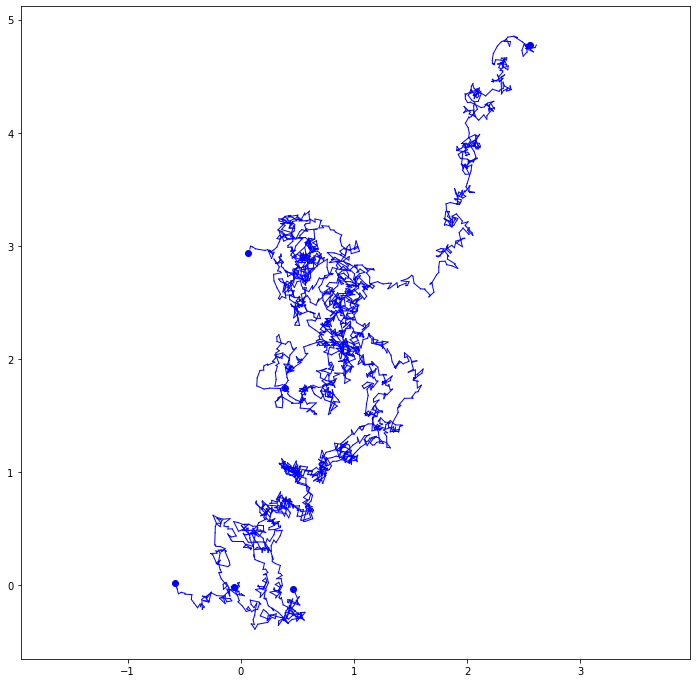

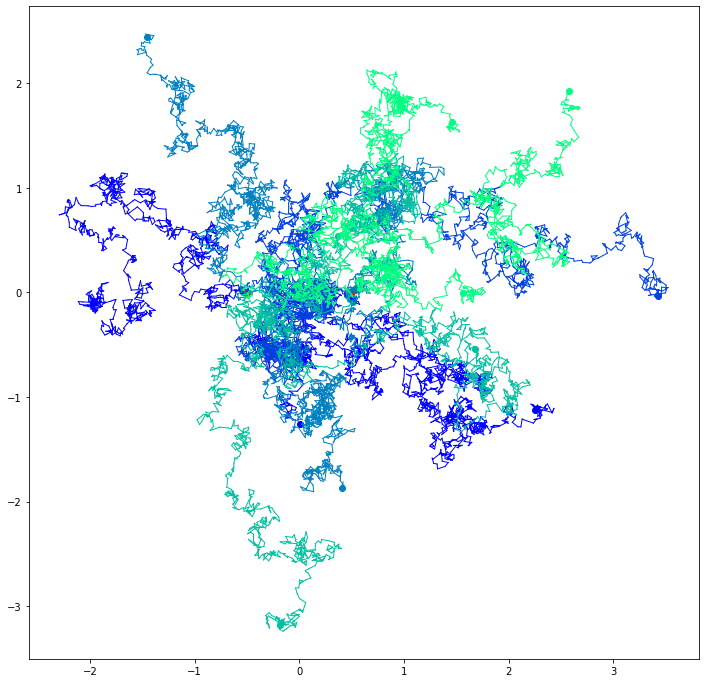

In [11]:
# coordinate form
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

(ts,xs,charts) = M.Brownian_coords(q,dWs(M.dim,n_steps=1000))

# plot
M.newfig()
M.plot()
M.plot_path(zip(xs,charts))
plt.show()

# plot multiple sample paths
N = 5
xss = np.zeros((N,xs.shape[0],M.dim))
chartss = np.zeros((N,xs.shape[0],q[1].shape[0]))
for i in range(N):
    (ts,xs,charts) = M.Brownian_coords(q,dWs(M.dim,n_steps=xs.shape[0]))
    xss[i] = xs
    chartss[i] = charts

# plot
M.newfig()
M.plot()
colormap = plt.get_cmap('winter')
colors=[colormap(k) for k in np.linspace(0, 1, N)]
for i in range(N):
    M.plot_path(zip(xss[i],chartss[i]),color=colors[i])
M.plotx(q,color='r')
plt.show()